In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import numpy as np

pd.options.display.float_format = '{:.2f}'.format

import warnings 
warnings.filterwarnings('ignore')

In [27]:
# load data from csv file
df = pd.read_csv("Data.csv", sep=',')
df

,Comments,Type
0,វីដេអូ ពេញចឹងមកគេយល់ច្រើនហើយ អញ្ចឹងហើយគេមិនយល់...,0.00
1,៣៣៥៥ឆ្កែបើកឡាន,1.00
2,ឡានថោកហេីយចរិកអ្នកបេីកថោកទៀត GS,1.00
3,នេះជាខួររបស់តួចឹត្តអាក្រក,1.00
4,មុខពេទ្យកាល់ម៉ែត្រ,0.00
...,...,...
6312,អាឆ្កែបេីកឡានខ្មៅ,1.00
6313,សំណាងហេីយបងដែលខ្ញុំអត់ខមិនជេ​ ព្រោះខ្ញុំគិតថាម...,0.00
6314,បច់ចឹងបានគេហេីអ្នកចេះបេីកឡាន,0.00
6315,កោកវាឲបែក១ចំហៀងអត់,0.00


In [28]:
# count missing values for each column
print("Missing Value: ", sum(df.isnull().sum()))
# count duplicatte values
print("Duplicated Value: ", df.duplicated().sum())

Missing Value:  6
Duplicated Value:  10


In [29]:
# Remove duplicate
unique_records = df.drop_duplicates()
redundant_records = df[df.duplicated()]
df = df.drop_duplicates().dropna()

print("Duplicated Value: ", df.duplicated().sum())
print("Missing Values: ", df.isnull().sum().sum())

Duplicated Value:  0
Missing Values:  0


In [30]:
non_hateful = df[df['Type'] == 0]
hateful = df[df['Type'] == 1]

print(non_hateful.head(5))
print(hateful.head(5))

                                            Comments  Type
0  វីដេអូ ពេញចឹងមកគេយល់ច្រើនហើយ អញ្ចឹងហើយគេមិនយល់...  0.00
4                                 មុខពេទ្យកាល់ម៉ែត្រ  0.00
5  ចុះលេាកមិនសម្រាយចឹងតាំងពីដេីមមក យកVDOមួយផ្នែកម...  0.00
7  ខ្ញុំមើលរូបដូចជាមិនសូវអីទេណាស់តើអ្នកអីយាយចង់តែ...  0.00
8         អ្នកជេរគេនិងទូលរែកយកទៅ​ អាណិតតួរអង្គឯកណាស់  0.00
                                         Comments  Type
1                                  ៣៣៥៥ឆ្កែបើកឡាន  1.00
2                 ឡានថោកហេីយចរិកអ្នកបេីកថោកទៀត GS  1.00
3                       នេះជាខួររបស់តួចឹត្តអាក្រក  1.00
6   ញុមចង់ជេវាថាអាចុយម្រាយតែខ្លាចវាខឹងចឹងអត់ជេវិញ  1.00
10                             ប៉ះញុមវិញឡានសួរម៉ង  1.00


0.00    5333
1.00     968
Name: Type, dtype: int64


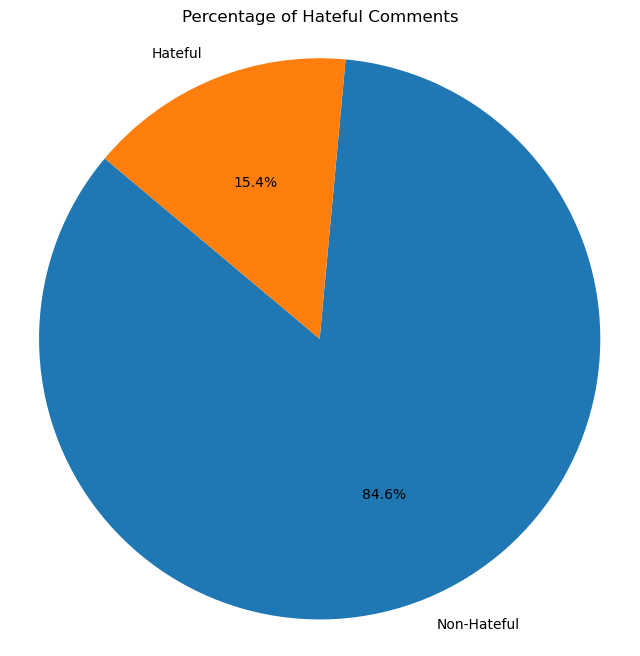

In [31]:
#write your code here 
import matplotlib.pyplot as plt
count_cmt = df["Type"].value_counts()
types = {0: 'Non-Hateful', 1: 'Hateful'}
print(count_cmt)
plt.figure(figsize=(8,8))
plt.pie(count_cmt, labels=count_cmt.index.map(types), autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hateful Comments')
plt.axis('equal')
plt.show()

0.00    5333
1.00    5333
Name: Type, dtype: int64


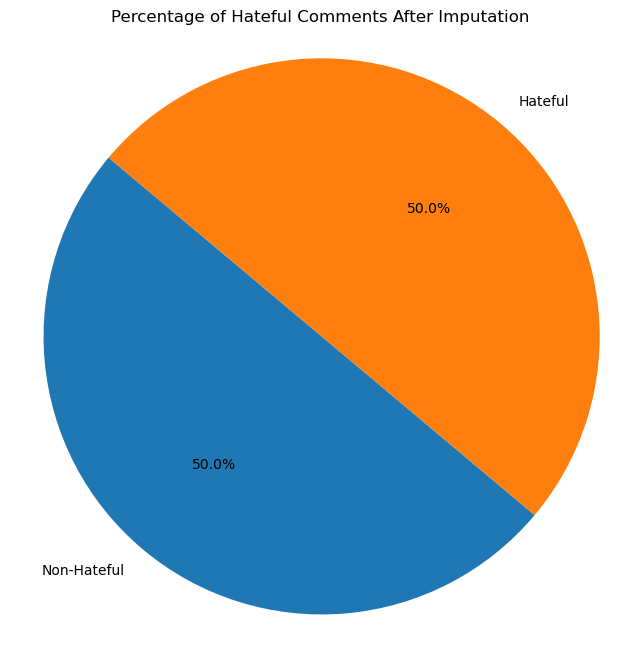

                                               Comments  Type
1                                        ៣៣៥៥ឆ្កែបើកឡាន  1.00
2                       ឡានថោកហេីយចរិកអ្នកបេីកថោកទៀត GS  1.00
3                             នេះជាខួររបស់តួចឹត្តអាក្រក  1.00
6         ញុមចង់ជេវាថាអាចុយម្រាយតែខ្លាចវាខឹងចឹងអត់ជេវិញ  1.00
10                                   ប៉ះញុមវិញឡានសួរម៉ង  1.00
...                                                 ...   ...
6305                                 ចុះទៅវៃក្បាលឯងអាយះ  1.00
6306       តាមពិតទៅខ្ញុំចង់ជេរឡាននោះថាអាឆ្កែ តែខ្លាចបាប  1.00
6308          ញុមចង់ជេរវាថាអាឆ្កួតតែខ្ញុំខ្លាចគេខឹង🙂‍↔️  1.00
6312                                  អាឆ្កែបេីកឡានខ្មៅ  1.00
6316  បកស្រាយសមហេតុផលទាំងអស់ ខ្ញុំមិនដែលបេីកប៉ាភ្លេី...  1.00

[968 rows x 2 columns]


In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Comments']) 
y = df['Type'] 

# Perform SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled.toarray())
df_resampled['Type'] = y_resampled

# Check the new distribution
count_cmt_resampled = df_resampled["Type"].value_counts()
print(count_cmt_resampled)

# Plot the new distribution
plt.figure(figsize=(8, 8))
types = {0: 'Non-Hateful', 1: 'Hateful'}
plt.pie(count_cmt_resampled, labels=count_cmt_resampled.index.map(types), autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hateful Comments After Imputation')
plt.axis('equal')
plt.show()

hateful = df[df['Type'] == 1]

print(hateful)

In [33]:
import re
# Function to clean comments
def remove_punc(cmt):
    emoji_pattern = re.compile("["  
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    pattern = re.compile(r'[^a-zA-Z0-9\u1780-\u17FF\s]')
    cleaned_text = pattern.sub(r'', cmt)
    cleaned_text = emoji_pattern.sub(r'', cmt)
    cleaned_text = re.sub(r'\s+', '', cleaned_text).strip()
    return cleaned_text

df['Cleaned_cmt'] = df['Comments'].apply(remove_punc)

print(df)

                                               Comments  Type  \
0     វីដេអូ ពេញចឹងមកគេយល់ច្រើនហើយ អញ្ចឹងហើយគេមិនយល់...  0.00   
1                                        ៣៣៥៥ឆ្កែបើកឡាន  1.00   
2                       ឡានថោកហេីយចរិកអ្នកបេីកថោកទៀត GS  1.00   
3                             នេះជាខួររបស់តួចឹត្តអាក្រក  1.00   
4                                    មុខពេទ្យកាល់ម៉ែត្រ  0.00   
...                                                 ...   ...   
6312                                  អាឆ្កែបេីកឡានខ្មៅ  1.00   
6313  សំណាងហេីយបងដែលខ្ញុំអត់ខមិនជេ​ ព្រោះខ្ញុំគិតថាម...  0.00   
6314                       បច់ចឹងបានគេហេីអ្នកចេះបេីកឡាន  0.00   
6315                                 កោកវាឲបែក១ចំហៀងអត់  0.00   
6316  បកស្រាយសមហេតុផលទាំងអស់ ខ្ញុំមិនដែលបេីកប៉ាភ្លេី...  1.00   

                                            Cleaned_cmt  
0     វីដេអូពេញចឹងមកគេយល់ច្រើនហើយអញ្ចឹងហើយគេមិនយល់ច្...  
1                                        ៣៣៥៥ឆ្កែបើកឡាន  
2                        ឡានថោកហេីយចរិកអ្នកបេ

In [34]:
def load_stopword(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = [line.strip() for line in f if line.strip()]
    return stopwords

def remove_stopword(cmt):
        stopwords = load_stopword("Khmer_Stop_word.txt")
        cleaned_cmt = [word for word in cmt.split() if word.lower() not in stopwords]
        cleaned_cmt = ' '.join(cleaned_cmt)
        return cleaned_cmt

In [35]:
from khmernltk import sentence_tokenize
from khmernltk import word_tokenize
import json

def load_merge_map(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def merge_word(cmt):
    # Replace each phrase in the comment
    merge_map = load_merge_map("merge_map.json")
    for phrase, merged in merge_map.items():
        # Normalize spaces in the phrase and replace with generic whitespace match
        escaped_phrase = re.escape(phrase).replace(r'\ ', r'\s+')
        # Remove \b for Unicode compatibility
        regex_pattern = rf'(?<!\S){escaped_phrase}(?!\S)'
        cmt = re.sub(regex_pattern, merged, cmt)
    return cmt

def tokenize(cmt):
    words = word_tokenize(cmt, return_tokens=True)
    sentence = ' '.join(word for word in words if word.strip())
    sentence = merge_word(sentence)
    sentence = remove_stopword(sentence)
    return sentence

df['Cleaned_cmt'] = df['Cleaned_cmt'].apply(tokenize)
print(df['Cleaned_cmt'])

0                             វីដេអូ ចឹង យល់ យល់ ច្រឡំ ជេ
1                                           ៣៣៥៥ ឆ្កែ ឡាន
2                            ឡាន ថោក ចរិក បេីក ថោក ទៀត GS
3                                  ជា ខួរ តួ ចឹត្ត អាក្រក
4                                    មុខ ពេទ្យ កាល់ម៉ែត្រ
                              ...                        
6312                                អា ឆ្កែ បេីក ឡាន ខ្មៅ
6313     សំណាង បង ខ្ញុំ អត់ ខ ជេ ខ្ញុំ គិត ថា សុខ ៗ វា ទេ
6314                        បច់ ចឹង បាន ហេី ចេះ បេី ក ឡាន
6315                             កោក វា ឲ បែក ១ ចំហៀង អត់
6316    បកស្រាយ សម ហេតុផល ខ្ញុំ បេីក ប៉ាភ្លេី អា តួអង្...
Name: Cleaned_cmt, Length: 6301, dtype: object


In [36]:
def generate_unigram(cmt):
    cmt = remove_punc(cmt)
    cmt = merge_word(cmt)
    words = word_tokenize(cmt, return_tokens=True)
    words = [word for word in words if word.strip()]
    return words

def generate_bigrams(words, n):
    return list(nltk.ngrams(words, n))

df['unigrams'] = df['Cleaned_cmt'].apply(generate_unigram)
df['bigrams'] = df['unigrams'].apply(lambda x: generate_bigrams(x, 2))

print("\nUnigrams:")
print(df['unigrams'])
print("\nBigrams:")
print(df['bigrams'])


Unigrams:
0                      [វីដេអូ, ចឹង, យល់, យល់, ច្រឡំ, ជេ]
1                                       [៣៣៥៥, ឆ្កែ, ឡាន]
2                  [ឡាន, ថោក, ចរិក, បេី, ក, ថោក, ទៀត, GS]
3                            [ជា, ខួរ, តួ, ចឹត្ត, អាក្រក]
4                                [មុខ, ពេទ្យ, កាល់ម៉ែត្រ]
                              ...                        
6312                          [អា, ឆ្កែ, បេីក, ឡាន, ខ្មៅ]
6313    [សំណាង, បង, ខ្ញុំ, អត់, ខ, ជេ, ខ្ញុំ, គិត, ថា,...
6314                 [បច់, ចឹង, បាន, ហេី, ចេះ, បេីក, ឡាន]
6315                     [កោក, វា, ឲ, បែក, ១, ចំហៀង, អត់]
6316    [បកស្រាយ, សម, ហេតុផល, ខ្ញុំ, បេីក, ប៉ាភ្លេី, អ...
Name: unigrams, Length: 6301, dtype: object

Bigrams:
0       [(វីដេអូ, ចឹង), (ចឹង, យល់), (យល់, យល់), (យល់, ...
1                             [(៣៣៥៥, ឆ្កែ), (ឆ្កែ, ឡាន)]
2       [(ឡាន, ថោក), (ថោក, ចរិក), (ចរិក, បេី), (បេី, ក...
3       [(ជា, ខួរ), (ខួរ, តួ), (តួ, ចឹត្ត), (ចឹត្ត, អា...
4                     [(មុខ, ពេទ្យ), (ពេទ្យ, កាល់ម៉ែត្រ)]
       

In [37]:
from nltk.probability import FreqDist

# Initialize frequency distributions
fdist = FreqDist()

# Separate unigrams and bigrams for hate speech and non-hate speech
hate_speech_unigrams = []
non_hate_speech_unigrams = []
hate_speech_bigrams = []
non_hate_speech_bigrams = []

all_unigrams = [word for tokens in df['unigrams'] for word in tokens]
all_bigrams = [bigram for bigrams in df['bigrams'] for bigram in bigrams]
unigram_freq = FreqDist(all_unigrams)
bigram_freq = FreqDist(all_bigrams)

# Iterate through the DataFrame and collect unigrams and bigrams
for index, row in df.iterrows():
    if row['Type'] == 1:  # Assuming 1 indicates hate speech
        hate_speech_unigrams.extend(row['unigrams'])
        hate_speech_bigrams.extend(row['bigrams'])
    else:  # Assuming 0 indicates non-hate speech
        non_hate_speech_unigrams.extend(row['unigrams'])
        non_hate_speech_bigrams.extend(row['bigrams'])

# Calculate frequency distributions
hate_unigram_freq = FreqDist(hate_speech_unigrams)
non_hate_unigram_freq = FreqDist(non_hate_speech_unigrams)
hate_bigram_freq = FreqDist(hate_speech_bigrams)
non_hate_bigram_freq = FreqDist(non_hate_speech_bigrams)

# Print most common unigrams
print("Most common Unigrams in Hate Speech:")
for word, freq in hate_unigram_freq.most_common(10):
    print(f"{word}: {freq}")

print("\nMost common Unigrams in Non-Hate Speech:")
for word, freq in non_hate_unigram_freq.most_common(10):
    print(f"{word}: {freq}")

# Print most common bigrams
print("\nMost common Bigrams in Hate Speech:")
for bigram, freq in hate_bigram_freq.most_common(10):
    print(f"{bigram}: {freq}")

print("\nMost common Bigrams in Non-Hate Speech:")
for bigram, freq in non_hate_bigram_freq.most_common(10):
    print(f"{bigram}: {freq}")

Most common Unigrams in Hate Speech:
ទេ: 141
វា: 121
អា: 102
ពួក: 102
អត់: 94
មាន: 87
ៗ: 81
បាន: 81
ឆ្កែ: 80
ឡាន: 77

Most common Unigrams in Non-Hate Speech:
ទេ: 1014
មាន: 933
អត់: 814
បាន: 735
ខ្ញុំ: 722
ក៏: 582
លុយ: 552
ដែរ: 546
ថា: 511
មើល: 501

Most common Bigrams in Hate Speech:
('ពួក', 'អា'): 50
('អា', 'ឆ្កែ'): 15
('ចុយ', 'ម្រាយ'): 13
('អា', 'ថោក'): 11
('អាច', 'ម៌'): 11
('ស្រុក', 'ខ្មែរ'): 10
('អាចុយ', 'ម្រាយ'): 9
('មាន', 'ឡាន'): 9
('ឡប់', 'ៗ'): 9
('វា', 'ថា'): 9

Most common Bigrams in Non-Hate Speech:
('អត់', 'មាន'): 120
('ស្រុក', 'ខ្មែរ'): 83
('មាន', 'លុយ'): 82
('ក៏', 'មាន'): 60
('ទេ', '។'): 54
('?', '?'): 54
('ក៏', 'បាន'): 53
('ខ្ញុំ', 'ក៏'): 50
('លុយ', 'ក្រៅ'): 44
('កង់', 'បី'): 44


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn.naive_bayes import BernoulliNB

In [39]:
def estimate_next_word_probability(word, previous_word, unigram_counts, bigram_counts):
    bigram = (previous_word, word)

    previous_word_count = unigram_counts.get(previous_word, 0)
    bigram_count = bigram_counts.get(bigram, 0)

    if previous_word_count == 0:
        return 0.0
    
    probability =  bigram_count / previous_word_count

    return probability


In [40]:

def predict_next_words(previous_word, unigram_counts, bigram_counts, top_n=5):
    predictions = []

    for word in unigram_counts.keys():
        probability = estimate_next_word_probability(word, previous_word, unigram_counts, bigram_counts)

        predictions.append((word, probability))

    predictions.sort(key=lambda x: x[1], reverse=True)

    return predictions[:top_n]

In [41]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_cmt'], df['Type'], test_size=0.25, random_state=42
)

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(
    analyzer='word', token_pattern=r'\S+'
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
MNB = MultinomialNB()
MNB.fit(X_train_vec, y_train)

BNB = BernoulliNB()
BNB.fit(X_train_vec, y_train)

# Make predictions
y_pred = MNB.predict(X_test_vec)
y_pred_BNB = BNB.predict(X_test_vec)

# Evaluate the model
print("MNB Reports:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------")
print("BNB Reports:")
print("Accuracy:", accuracy_score(y_test, y_pred_BNB))
print("Classification Report:\n", classification_report(y_test, y_pred_BNB))


MNB Reports:
Accuracy: 0.9022842639593909
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.94      1338
         1.0       0.84      0.43      0.57       238

    accuracy                           0.90      1576
   macro avg       0.88      0.71      0.76      1576
weighted avg       0.90      0.90      0.89      1576

--------------------------------------------------------------------------
BNB Reports:
Accuracy: 0.866751269035533
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1338
         1.0       0.87      0.14      0.24       238

    accuracy                           0.87      1576
   macro avg       0.87      0.57      0.58      1576
weighted avg       0.87      0.87      0.82      1576



In [42]:
# Predict hate speech for new Khmer text
def predict_hate_speech_khmer(cmt):
    print("Inputed Comment: ", cmt)
    unigram = generate_unigram(cmt)

    cmt = remove_punc(cmt)
    cmt = tokenize(cmt)   
    comment_vec = vectorizer.transform([cmt])

    MNBPredict = MNB.predict(comment_vec)
    BNBPredict = BNB.predict(comment_vec)
    
    word = ''
    previous_word = ''

    if len(unigram) > 0:
        word = unigram[len(unigram) - 1]                     # Last word
        previous_word = unigram[len(unigram) -2] if len(unigram) > 1 else None  # Previous word
    else:
        word = None
        previous_word = None

    print("Current word: ",word)
    print("Previous word: ",previous_word)
    probability = estimate_next_word_probability(word, previous_word, unigram_counts, bigram_counts)
    print("Probability: ",probability)

    top_predictions = predict_next_words(word, unigram_freq, bigram_freq, top_n=5)
    for word, probability in top_predictions:
        print(f"Word: {word}, Probability: {probability}")

    return "Hate Speech" if MNBPredict[0] == 1 else "Non-Hate Speech", "Hate Speech" if BNBPredict[0] == 1 else "Non-Hate Speech"

unigram_counts = Counter([word for unigrams in df['unigrams'] for word in unigrams])
bigram_counts = Counter([bigram for bigrams in df['bigrams'] for bigram in bigrams])
new_comment = "អាបាកាច់"

mnb, bnb = predict_hate_speech_khmer(new_comment)
print("MNB Prediction: ", mnb)
print("BNB Prediction: ", mnb)

Inputed Comment:  អាបាកាច់
Current word:  អាបាកាច់
Previous word:  None
Probability:  0.0
Word: យក, Probability: 0.5
Word: _________., Probability: 0.25
Word: វីដេអូ, Probability: 0.0
Word: ចឹង, Probability: 0.0
Word: យល់, Probability: 0.0
MNB Prediction:  Hate Speech
BNB Prediction:  Hate Speech
